In [1]:
library('readr')
library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('stringr')

library('msa')
require('ggseqlogo')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: Biostrings
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, c

# Load data

In [2]:
donor1 <- 
    read_csv(
        '../data//vdj_v1_hs_aggregated_donor1_binarized_matrix.csv'
    )

donor1 %>% head

Parsed with column specification:
cols(
  .default = col_double(),
  barcode = col_character(),
  donor = col_character(),
  cell_clono_cdr3_aa = col_character(),
  cell_clono_cdr3_nt = col_character(),
  `A0101_VTEHDTLLY_IE-1_CMV_binder` = col_logical(),
  A0201_KTWGQYWQV_gp100_Cancer_binder = col_logical(),
  `A0201_ELAGIGILTV_MART-1_Cancer_binder` = col_logical(),
  A0201_CLLWSFQTSA_Tyrosinase_Cancer_binder = col_logical(),
  A0201_IMDQVPFSV_gp100_Cancer_binder = col_logical(),
  `A0201_SLLMWITQV_NY-ESO-1_Cancer_binder` = col_logical(),
  `A0201_KVAELVHFL_MAGE-A3_Cancer_binder` = col_logical(),
  `A0201_KVLEYVIKV_MAGE-A1_Cancer_binder` = col_logical(),
  `A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase_binder` = col_logical(),
  `A0201_LLDFVRFMGV_EBNA-3B_EBV_binder` = col_logical(),
  `A0201_LLMGTLGIVC_HPV-16E7_82-91_binder` = col_logical(),
  `A0201_CLGGLLTMV_LMP-2A_EBV_binder` = col_logical(),
  A0201_YLLEMLWRL_LMP1_EBV_binder = col_logical(),
  A0201_FLYALALLL_LMP2A_EBV_binder = col_log

barcode,donor,cell_clono_cdr3_aa,cell_clono_cdr3_nt,CD3,CD19,CD45RA,CD4,CD8a,CD14,⋯,B0702_RPHERNGFTVL_pp65_CMV_binder,B0801_RAKFKQLL_BZLF1_EBV_binder,B0801_ELRRKMMYM_IE-1_CMV_binder,B0801_FLRGRAYGL_EBNA-3A_EBV_binder,A0101_SLEGGGLGY_NC_binder,A0101_STEGGGLAY_NC_binder,A0201_ALIAPVHAV_NC_binder,A2402_AYSSAGASI_NC_binder,B0702_GPAESAAGL_NC_binder,NR(B0801)_AAKGRGAAL_NC_binder
AAACCTGAGACAAAGG-4,donor1,TRA:CAASVSIWTGTASKLTF;TRA:CAAWDMEYGNKLVF;TRB:CAISDPGLAGGGGEQFF,TRA:TGTGCAGCAAGCGTTAGTATTTGGACCGGCACTGCCAGTAAACTCACCTTT;TRA:TGTGCCGCCTGGGACATGGAATATGGAAACAAGCTGGTCTTT;TRB:TGTGCCATCAGTGACCCCGGACTAGCGGGAGGCGGGGGGGAGCAGTTCTTC,2125,0,912,1,2223,4,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AAACCTGAGACTGTAA-34,donor1,TRB:CASDTPVGQFF,TRB:TGTGCCAGCGATACCCCGGTTGGGCAGTTCTTC,1023,0,2028,2,3485,1,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AAACCTGAGAGCCCAA-5,donor1,TRA:CASYTDKLIF;TRB:CASSGGSISTDTQYF,TRA:TGTGCTTCCTACACCGACAAGCTCATCTTT;TRB:TGCGCCAGCAGTGGCGGGAGTATTAGCACAGATACGCAGTATTTT,1598,3,3454,4,3383,1,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AAACCTGAGAGCTGCA-24,donor1,TRB:CASSGGQSSYEQYF,TRB:TGCGCCAGCAGTGGCGGACAGAGCTCCTACGAGCAGTACTTC,298,1,880,1,2389,1,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AAACCTGAGAGGGATA-8,donor1,TRA:CAASGYGNTGRRALTF;TRB:CASSQDPAGGYNEQFF,TRA:TGTGCAGCAAGCGGGTATGGAAACACGGGCAGGAGAGCACTTACTTTT;TRB:TGCGCCAGCAGCCAAGACCCAGCGGGGGGGTACAATGAGCAGTTCTTC,1036,0,2457,2,3427,3,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AAACCTGAGAGTGAGA-23,donor1,TRA:CAAHLSNFGNEKLTF;TRB:CATSRDRGHGDTIYF,TRA:TGTGCAGCACACTTATCTAACTTTGGAAATGAGAAATTAACCTTT;TRB:TGTGCCACCAGCAGAGATCGGGGCCATGGGGACACCATATATTTT,1729,1,39,160,5671,5,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [3]:
donor1 %>% colnames

[1] "barcode"                                        
  [2] "donor"                                          
  [3] "cell_clono_cdr3_aa"                             
  [4] "cell_clono_cdr3_nt"                             
  [5] "CD3"                                            
  [6] "CD19"                                           
  [7] "CD45RA"                                         
  [8] "CD4"                                            
  [9] "CD8a"                                           
 [10] "CD14"                                           
 [11] "CD45RO"                                         
 [12] "CD279_PD-1"                                     
 [13] "IgG1"                                           
 [14] "IgG2a"                                          
 [15] "IgG2b"                                          
 [16] "CD127"                                          
 [17] "CD197_CCR7"                                     
 [18] "HLA-DR"                                         
 [19] "A0101_VTEHDTLLY_IE-1_CMV"                       
 [20] "A0201_KTWGQYWQV_gp100_Cancer"                   
 [21] "A0201_ELAGIGILTV_MART-1_Cancer"                 
 [22] "A0201_CLLWSFQTSA_Tyrosinase_Cancer"             
 [23] "A0201_IMDQVPFSV_gp100_Cancer"                   
 [24] "A0201_SLLMWITQV_NY-ESO-1_Cancer"                
 [25] "A0201_KVAELVHFL_MAGE-A3_Cancer"                 
 [26] "A0201_KVLEYVIKV_MAGE-A1_Cancer"                 
 [27] "A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase"       
 [28] "A0201_LLDFVRFMGV_EBNA-3B_EBV"                   
 [29] "A0201_LLMGTLGIVC_HPV-16E7_82-91"                
 [30] "A0201_CLGGLLTMV_LMP-2A_EBV"                     
 [31] "A0201_YLLEMLWRL_LMP1_EBV"                       
 [32] "A0201_FLYALALLL_LMP2A_EBV"                      
 [33] "A0201_GILGFVFTL_Flu-MP_Influenza"               
 [34] "A0201_GLCTLVAML_BMLF1_EBV"                      
 [35] "A0201_NLVPMVATV_pp65_CMV"                       
 [36] "A0201_ILKEPVHGV_RT_HIV"                         
 [37] "A0201_FLASKIGRLV_Ca2-indepen-Plip-A2"           
 [38] "A2402_CYTWNQMNL_WT1-(235-243)236M_Y"            
 [39] "A0201_RTLNAWVKV_Gag-protein_HIV"                
 [40] "A0201_KLQCVDLHV_PSA146-154"                     
 [41] "A0201_LLFGYPVYV_HTLV-1"                         
 [42] "A0201_SLFNTVATL_Gag-protein_HIV"                
 [43] "A0201_SLYNTVATLY_Gag-protein_HIV"               
 [44] "A0201_SLFNTVATLY_Gag-protein_HIV"               
 [45] "A0201_RMFPNAPYL_WT-1"                           
 [46] "A0201_YLNDHLEPWI_BCL-X_Cancer"                  
 [47] "A0201_MLDLQPETT_16E7_HPV"                       
 [48] "A0301_KLGGALQAK_IE-1_CMV"                       
 [49] "A0301_RLRAEAQVK_EMNA-3A_EBV"                    
 [50] "A0301_RIAAWMATY_BCL-2L1_Cancer"                 
 [51] "A1101_IVTDFSVIK_EBNA-3B_EBV"                    
 [52] "A1101_AVFDRKSDAK_EBNA-3B_EBV"                   
 [53] "B3501_IPSINVHHY_pp65_CMV"                       
 [54] "A2402_AYAQKIFKI_IE-1_CMV"                       
 [55] "A2402_QYDPVAALF_pp65_CMV"                       
 [56] "B0702_QPRAPIRPI_EBNA-6_EBV"                     
 [57] "B0702_TPRVTGGGAM_pp65_CMV"                      
 [58] "B0702_RPPIFIRRL_EBNA-3A_EBV"                    
 [59] "B0702_RPHERNGFTVL_pp65_CMV"                     
 [60] "B0801_RAKFKQLL_BZLF1_EBV"                       
 [61] "B0801_ELRRKMMYM_IE-1_CMV"                       
 [62] "B0801_FLRGRAYGL_EBNA-3A_EBV"                    
 [63] "A0101_SLEGGGLGY_NC"                             
 [64] "A0101_STEGGGLAY_NC"                             
 [65] "A0201_ALIAPVHAV_NC"                             
 [66] "A2402_AYSSAGASI_NC"                             
 [67] "B0702_GPAESAAGL_NC"                             
 [68] "NR(B0801)_AAKGRGAAL_NC"                         
 [69] "A0101_VTEHDTLLY_IE-1_CMV_binder"                
 [70] "A0201_KTWGQYWQV_gp100_Cancer_binder"            
 [71] "A0201_ELAGIGILTV_MART-1_Cancer_binder"          
 [72] "A0201_CLLWSFQTSA_Ty

# Extract the surface marker expression

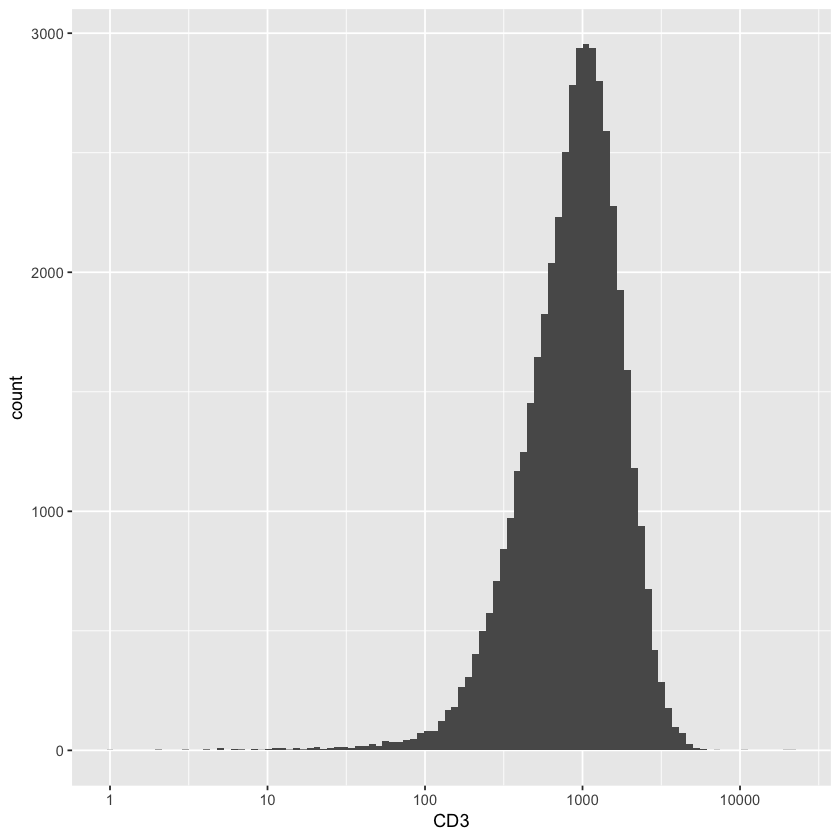

In [4]:
donor1_surface <-
    donor1 %>%
    select(`barcode`:`HLA-DR`)

donor1_surface %>%
    ggplot(aes(x=`CD3`)) +
        geom_histogram(bins=100) +
        scale_x_log10()

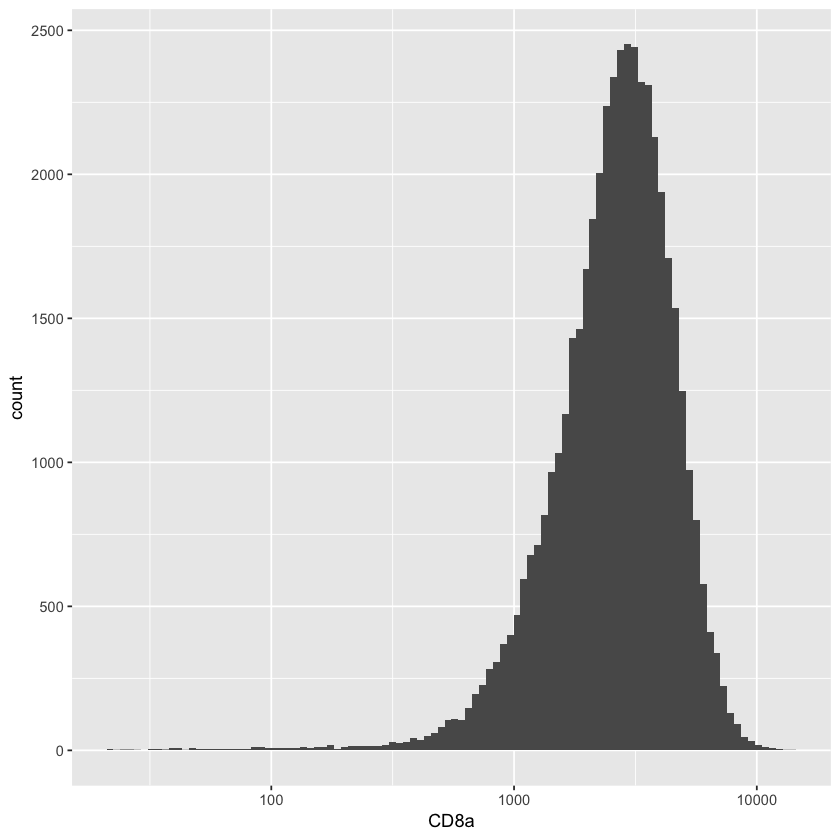

In [5]:
donor1_surface %>%
    ggplot(aes(x=`CD8a`)) +
        geom_histogram(bins=100) +
        scale_x_log10()

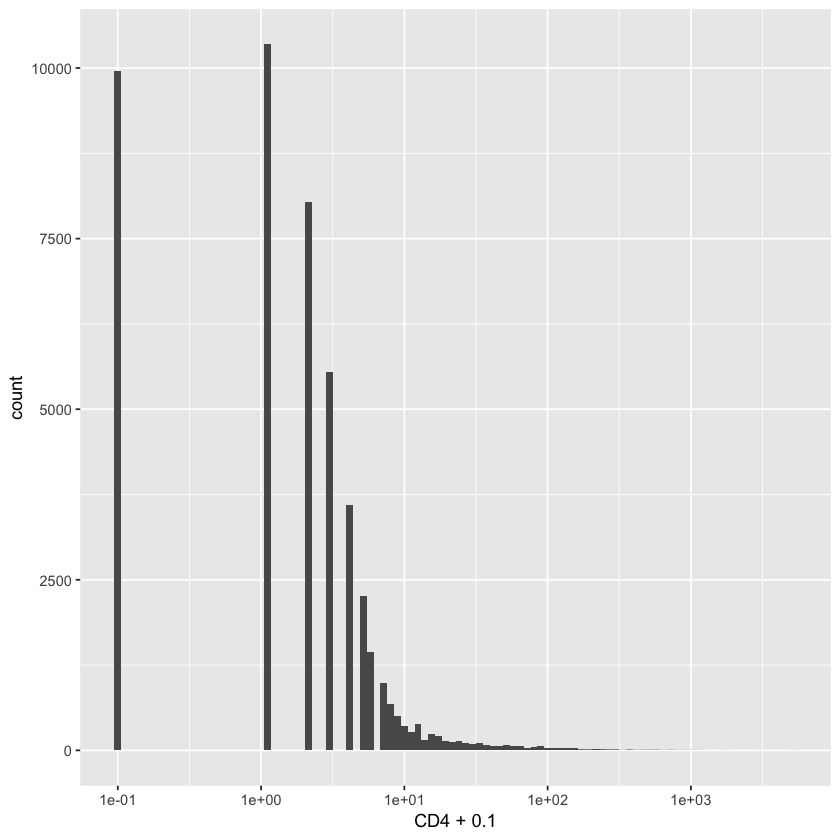

In [6]:
donor1_surface %>%
    ggplot(aes(x=`CD4` + .1)) +
        geom_histogram(bins=100) +
        scale_x_log10()

In [7]:
exp_threshold <- 100 # reads

# Extract TCRA and TCRB CDR3 regions

In [8]:
donor1 %>%
    select(`barcode`:`cell_clono_cdr3_aa`) %>%
    head

barcode,donor,cell_clono_cdr3_aa
AAACCTGAGACAAAGG-4,donor1,TRA:CAASVSIWTGTASKLTF;TRA:CAAWDMEYGNKLVF;TRB:CAISDPGLAGGGGEQFF
AAACCTGAGACTGTAA-34,donor1,TRB:CASDTPVGQFF
AAACCTGAGAGCCCAA-5,donor1,TRA:CASYTDKLIF;TRB:CASSGGSISTDTQYF
AAACCTGAGAGCTGCA-24,donor1,TRB:CASSGGQSSYEQYF
AAACCTGAGAGGGATA-8,donor1,TRA:CAASGYGNTGRRALTF;TRB:CASSQDPAGGYNEQFF
AAACCTGAGAGTGAGA-23,donor1,TRA:CAAHLSNFGNEKLTF;TRB:CATSRDRGHGDTIYF


In [9]:
donor1_tcrs <-
    donor1 %>%
    select(`barcode`:`cell_clono_cdr3_aa`) %>%
    separate_rows(`cell_clono_cdr3_aa`, sep=";") %>%
    separate(`cell_clono_cdr3_aa`, c('TCR', 'CDR3'), sep=":") %>%
    mutate(`TCR`=factor(`TCR`))

donor1_tcrs %>% head

barcode,donor,TCR,CDR3
AAACCTGAGACAAAGG-4,donor1,TRA,CAASVSIWTGTASKLTF
AAACCTGAGACAAAGG-4,donor1,TRA,CAAWDMEYGNKLVF
AAACCTGAGACAAAGG-4,donor1,TRB,CAISDPGLAGGGGEQFF
AAACCTGAGACTGTAA-34,donor1,TRB,CASDTPVGQFF
AAACCTGAGAGCCCAA-5,donor1,TRA,CASYTDKLIF
AAACCTGAGAGCCCAA-5,donor1,TRB,CASSGGSISTDTQYF


In [10]:
donor1_dcode_binder <-
    donor1 %>% 
    select(`barcode`, contains('_binder')) %>%
    gather(
       key=`dextramer`,
       value=`binder`,
       `A0101_VTEHDTLLY_IE-1_CMV_binder`:`NR(B0801)_AAKGRGAAL_NC_binder`,
       factor_key=TRUE
    ) %>%
    mutate(`binder`=as.factor(`binder`))

donor1_dcode_binder %>% head

barcode,dextramer,binder
AAACCTGAGACAAAGG-4,A0101_VTEHDTLLY_IE-1_CMV_binder,FALSE
AAACCTGAGACTGTAA-34,A0101_VTEHDTLLY_IE-1_CMV_binder,FALSE
AAACCTGAGAGCCCAA-5,A0101_VTEHDTLLY_IE-1_CMV_binder,FALSE
AAACCTGAGAGCTGCA-24,A0101_VTEHDTLLY_IE-1_CMV_binder,FALSE
AAACCTGAGAGGGATA-8,A0101_VTEHDTLLY_IE-1_CMV_binder,FALSE
AAACCTGAGAGTGAGA-23,A0101_VTEHDTLLY_IE-1_CMV_binder,FALSE


In [11]:
donor1_tcrs %>% 
    select(`CDR3`) %>% 
    mutate(`Length`=str_length(.$`CDR3`)) %>%
    select(`Length`) %>%
    as.matrix %>% median

[1] 14

# Motif extraction for FLU-dextramer positive cells

In [12]:
donor1_flu_binders <- 
    donor1_dcode_binder %>%
    filter(
        `dextramer` == 'A0201_GILGFVFTL_Flu-MP_Influenza_binder',
        `binder` == TRUE
    ) %>%
    left_join(`donor1_tcrs`, by='barcode')

donor1_flu_binders %>% head

barcode,dextramer,binder,donor,TCR,CDR3
AAACCTGAGTGGGTTG-17,A0201_GILGFVFTL_Flu-MP_Influenza_binder,TRUE,donor1,TRB,CASTDFGSGANVLTF
AAACCTGCAAACCCAT-9,A0201_GILGFVFTL_Flu-MP_Influenza_binder,TRUE,donor1,TRA,CAVNAGGGSQGNLIF
AAACCTGCAAACCCAT-9,A0201_GILGFVFTL_Flu-MP_Influenza_binder,TRUE,donor1,TRB,CASSTRSSYEQYF
AAACCTGCAAGAGGCT-17,A0201_GILGFVFTL_Flu-MP_Influenza_binder,TRUE,donor1,TRA,CAGGGSQGNLIF
AAACCTGCAAGAGGCT-17,A0201_GILGFVFTL_Flu-MP_Influenza_binder,TRUE,donor1,TRB,CASSIRSAYEQYF
AAACCTGCACATTAGC-21,A0201_GILGFVFTL_Flu-MP_Influenza_binder,TRUE,donor1,TRA,CAENEGGGSQGNLIF


use default substitution matrix


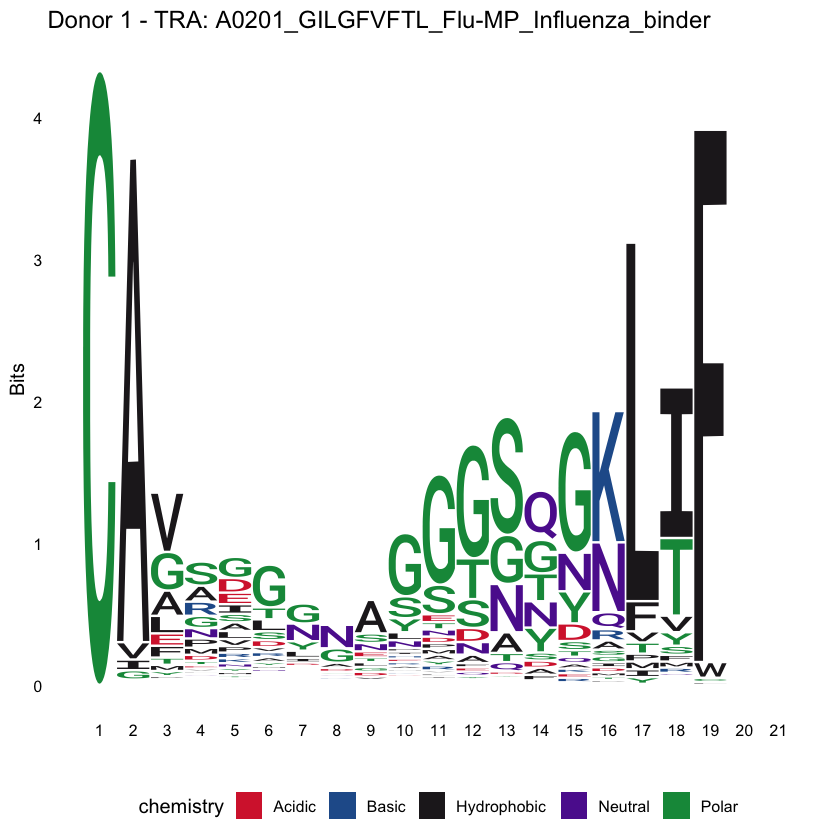

In [13]:
donor1_flu_tra <-
    donor1_flu_binders %>%
    filter(`TCR` == 'TRA') %>%
    select(`CDR3`) %>%
    unique

AAStringSet(donor1_flu_tra$`CDR3`) %>%
    msa %>%
    consensusMatrix %>%
    ggseqlogo + ggtitle('Donor 1 - TRA: A0201_GILGFVFTL_Flu-MP_Influenza_binder')

use default substitution matrix


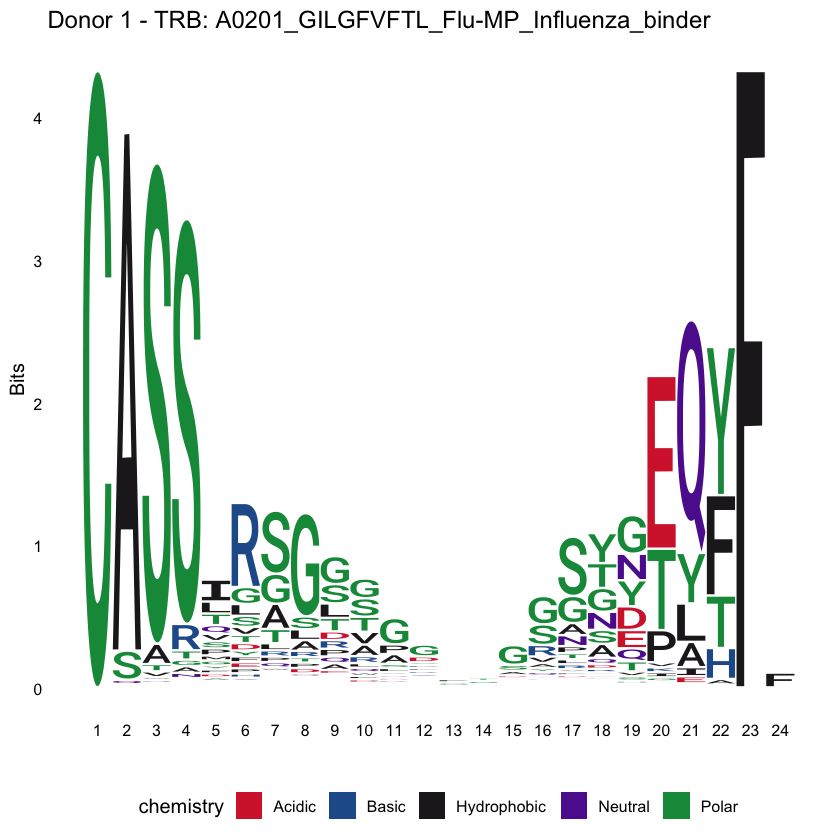

In [14]:
donor1_flu_trb <-
    donor1_flu_binders %>%
    filter(`TCR` == 'TRB') %>%
    select(`CDR3`) %>%
    unique

AAStringSet(donor1_flu_trb$`CDR3`) %>%
    msa %>%
    consensusMatrix %>%
    ggseqlogo + ggtitle('Donor 1 - TRB: A0201_GILGFVFTL_Flu-MP_Influenza_binder')